<a href="https://colab.research.google.com/github/hwarang97/spam_classifier/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
print(df.isna().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [4]:
df = df.drop('Unnamed: 0', axis=1)

([<matplotlib.patches.Wedge at 0x78a4d3afbfd0>,
 [Text(-0.041832502603297225, -1.0992042766137444, '0'),
  Text(0.04183239968836546, 1.0992042805303812, '1')],
 [Text(-0.022817728692707578, -0.5995659690620424, '71.0%'),
  Text(0.02281767255729025, 0.5995659711983897, '29.0%')])

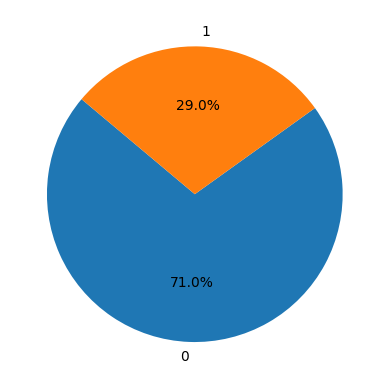

In [5]:
#Destribution of Target Variable
counts = df['label_num'].value_counts()
plt.pie(counts, labels= counts.index, autopct='%1.1f%%', startangle=140)

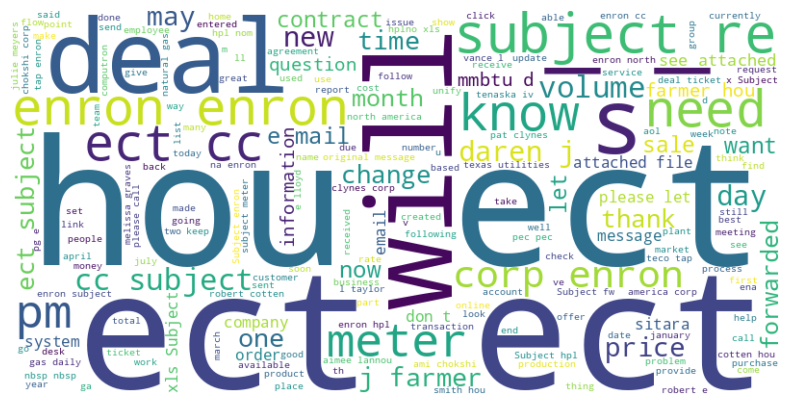

In [6]:
#World Cloud

text_corpus = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
X = df['text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#converting text data into a numerical format
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)

# Predict using the trained model
y_pred = naive_model.predict(X_test_vec)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9719806763285024


In [9]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035

